In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
def generate_W(t, dt, paths=1):
    W0 = np.zeros((paths, 1))
    dW = ss.norm.rvs(0, np.sqrt(dt), (paths, N - 1))
    dW = np.concatenate((W0, dW), axis=1)
    W = dW.cumsum(1)
    return dW, W

In [3]:
np.random.seed(42)

# 1.2 Play with the clay

$\mu(t) = 1 \cdot I_{[0,1)} + 2 \cdot I_{[1, 2)} + 5 \cdot I_{[2, 3)} - 1 \cdot I_{[3, 4)} - 5 \cdot I_{[4, 5)}$

In [4]:
def get_mu(t):
    if t < 0:
        return
    if t < 1:
        return 1
    if t < 2:
        return 2
    if t < 3:
        return 5
    if t < 4:
        return -1
    if t <= 5:
        return -5
    return

def generate_I(mu, dW, paths=1):
    dI = mu * dW
    I = np.cumsum(dI, axis=1)
    return I

(a) Let's simulate one path of $W_t$ and its corresponding path of $I_t = \int_0^t \mu(s) dW_s$

In [5]:
T = 5.0
N = 1_000
t, dt = np.linspace(0, T, N, retstep=True)
mu = np.vectorize(get_mu)(t)

In [6]:
dW, W = generate_W(t, dt)
I = generate_I(mu, dW)

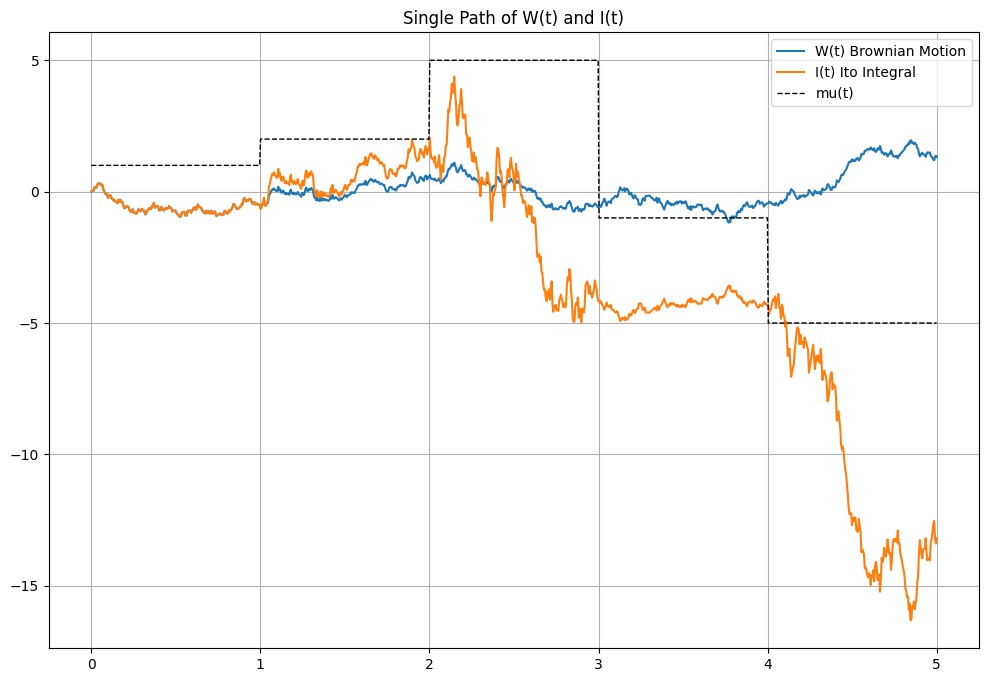

In [7]:
plt.figure(figsize=(12, 8))

plt.plot(t, W.T, label='W(t) Brownian Motion')
plt.plot(t, I.T, label='I(t) Ito Integral')
plt.plot(t, mu, label='mu(t)', color='black', linestyle='--', linewidth=1)

plt.title('Single Path of W(t) and I(t)')
plt.legend()
plt.grid(True)

plt.show()

(b) Simulation of 300 paths of $W_t$ and $I_t$

In [8]:
paths = 300
dW, W = generate_W(t, dt, paths=paths)
I = generate_I(mu, dW, paths=paths)

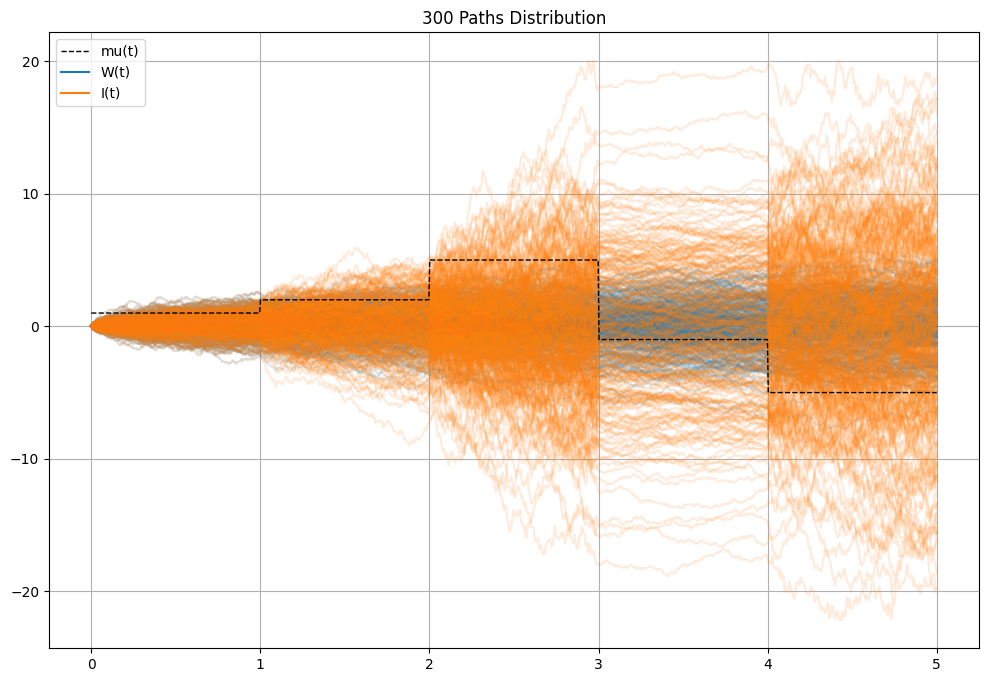

In [9]:
plt.figure(figsize=(12, 8))

plt.plot(t, W.T, color='#1f77b4', alpha=0.15)
plt.plot(t, I.T, color='#ff7f0e', alpha=0.15)
plt.plot(t, mu, label='mu(t)', color='black', linestyle='--', linewidth=1)

plt.plot([], [], color='#1f77b4', label='W(t)')
plt.plot([], [], color='#ff7f0e', label='I(t)')

plt.title('300 Paths Distribution')
plt.legend()
plt.grid(True)

plt.show()

(c) Comparison between analytical mean and quantiles with simulation results.

In [10]:
paths = 10_000
dW, W = generate_W(t, dt, paths=paths)
I = generate_I(mu, dW, paths=paths)

In [11]:
analytical_mean = np.zeros_like(t)

analytical_variance = np.cumsum(mu**2 * dt)
analytical_std = np.sqrt(analytical_variance)
analytical_upper = 1.645 * analytical_std
analytical_lower = -1.645 * analytical_std

In [12]:
sample_mean = np.mean(I, axis=0)
sample_q05 = np.quantile(I, 0.05, axis=0)
sample_q95 = np.quantile(I, 0.95, axis=0)

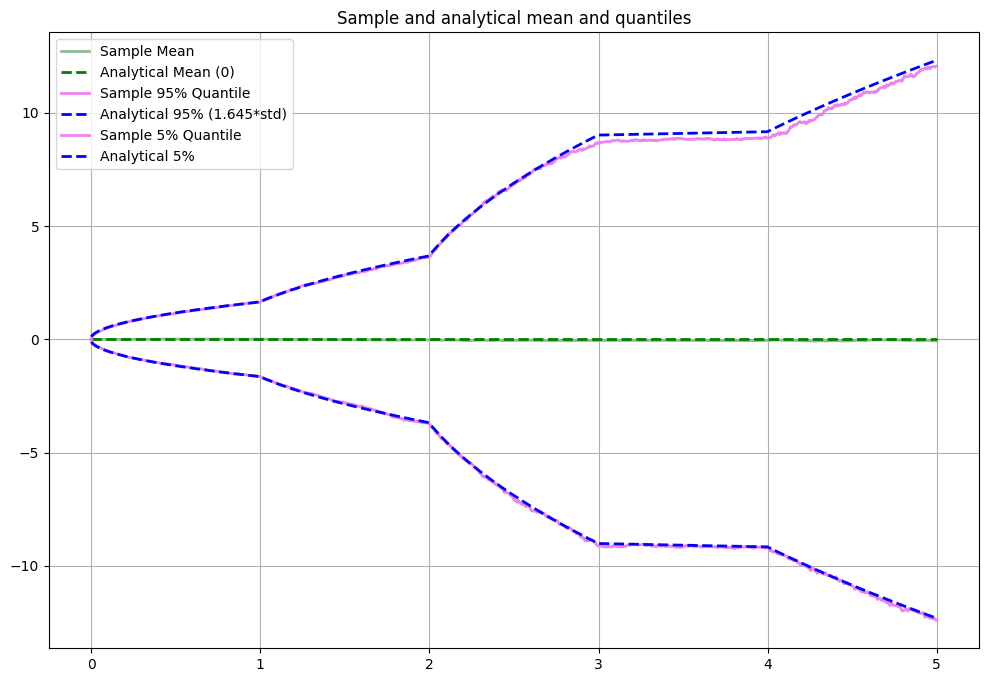

In [13]:
plt.figure(figsize=(12, 8))

plt.plot(t, sample_mean, color='darkseagreen', linewidth=2, label='Sample Mean')
plt.plot(t, analytical_mean, color='green', linestyle='--', linewidth=2, label='Analytical Mean (0)')

plt.plot(t, sample_q95, color='violet', linewidth=2, label='Sample 95% Quantile')
plt.plot(t, analytical_upper, color='blue', linestyle='--', linewidth=2, label='Analytical 95% (1.645*std)')

plt.plot(t, sample_q05, color='violet', linewidth=2, linestyle='-', label='Sample 5% Quantile')
plt.plot(t, analytical_lower, color='blue', linestyle='--', linewidth=2, label='Analytical 5%')

plt.title('Sample and analytical mean and quantiles')
plt.legend()
plt.grid(True)

plt.show()

Sample results indeed converge to analytical results.

# 1.3 Don't be so mean

$B_t = W_t - \int_0^t W_s ds = \int_0^t (1 - t + s) dW_s = (1 - t) W_t + \int_0^t s dW_s$

Distribution of $B_t \sim N(0, \frac{1 - (1 - t)^3}{3})$


In [14]:
def generate_B(dW, W, t, paths=1):
    B = (1 - t) * W + np.cumsum(t * dW, axis=1)
    return B

In [15]:
def generate_B_star(dW, W, t, paths=1):
    B = W - np.cumsum(W * dt, axis=1)
    # B =  - t) * W + np.cumsum(t * dW, axis=1)
    return B

In [16]:
T = 5.0
N = 1_000
t, dt = np.linspace(0, T, N, retstep=True)

In [17]:
dW, W = generate_W(t, dt)
B = generate_B(dW, W, t)

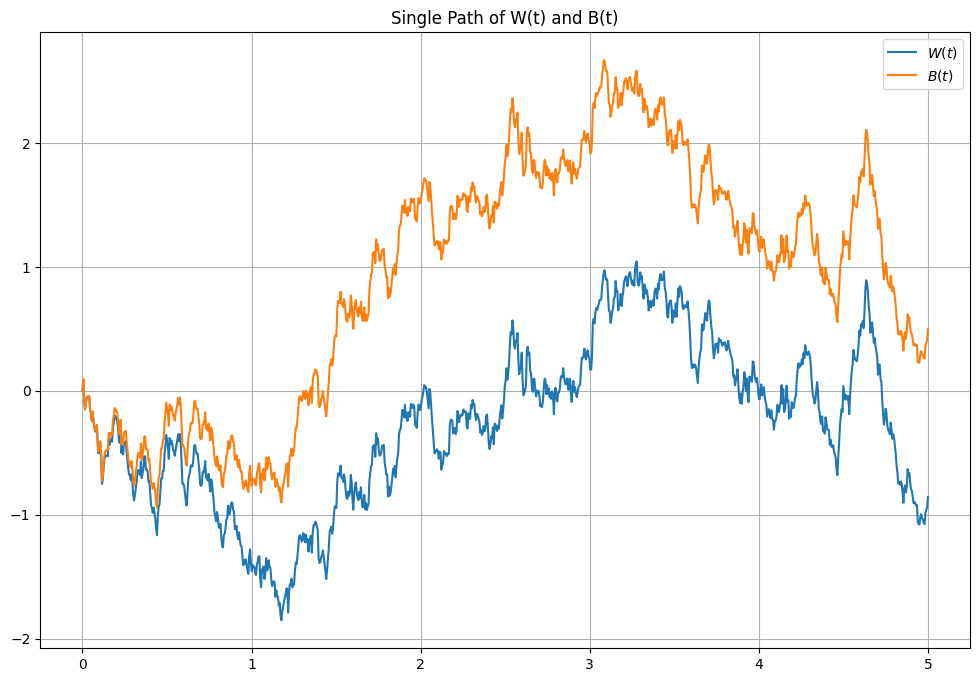

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(t, W.T, label='$W(t)$')
plt.plot(t, B.T, label='$B(t)$')

plt.title('Single Path of W(t) and B(t)')
plt.legend()
plt.grid(True)

plt.show()

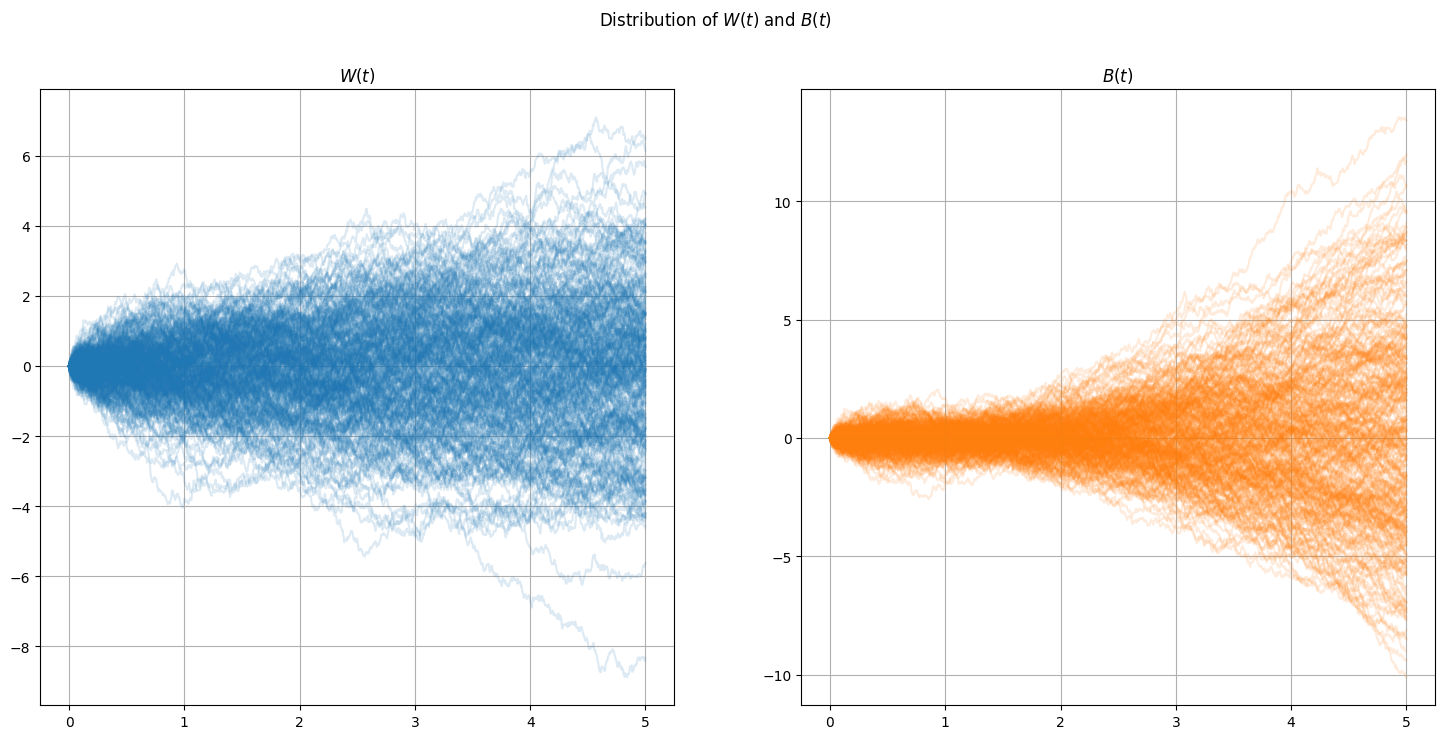

In [19]:
paths = 300
dW, W = generate_W(t, dt, paths=paths)
B = generate_B(dW, W, t, paths=paths)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.plot(t, W.T, label='$W(t)$', color='#1f77b4', alpha=0.15)
ax2.plot(t, B.T, label='$B(t)$', color='#ff7f0e', alpha=0.15)

ax1.set_title('$W(t)$')
ax1.grid(True)

ax2.set_title('$B(t)$')
ax2.grid(True)

plt.suptitle('Distribution of $W(t)$ and $B(t)$')
plt.show()